In [19]:
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt

import pickle

from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU, GlobalAveragePooling1D, Flatten, BatchNormalization

In [2]:
import sys

sys.path.append('../utils')

In [3]:
from predict import predict_class

In [4]:
TOKENIZER_PATH = '../learned_models/tokenizer.pickle'

X_TRAIN_PATH = '../data/x_train.json'
Y_TRAIN_PATH = '../data/y_train.json'

In [5]:
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [6]:
x_train = pd.read_json(X_TRAIN_PATH).values
y_train = pd.read_json(Y_TRAIN_PATH)

In [7]:
x_train, y_train

(array([[   0,    0,    0, ...,    7,    9,   10],
        [   0,    0,    0, ..., 2108, 3568,   74],
        [   0,    0,    0, ...,    7,    9,   10],
        ...,
        [   0,    0,    0, ...,   54,  515,  344],
        [   0,    0,    0, ...,  439,   24,   26],
        [   0,    0,    0, ...,   69,   69, 1602]]),
       АВТО БАТЯ  АЭРОФЛОТ  Телеграмма РЖД
 0             1         0               0
 1             1         0               0
 2             1         0               0
 3             1         0               0
 4             1         0               0
 ...         ...       ...             ...
 3085          0         0               1
 3086          0         0               1
 3087          0         0               1
 3088          0         0               1
 3089          0         0               1
 
 [3090 rows x 3 columns])

In [8]:
NUM_WORDS = 5_000                                 # Максимальное количество слов
MAX_NEWS_LEN = 100                                # Максимальная длина новости
NB_CLASSES = y_train.keys().shape[0]              # Количество классов

In [9]:
EMBEDDING_DIM = 32

In [10]:
model_gru = Sequential()
model_gru.add(Embedding(NUM_WORDS, EMBEDDING_DIM, input_length=MAX_NEWS_LEN))
model_gru.add(GRU(128, dropout=0.1, recurrent_dropout=0.1))
model_gru.add(Dense(NB_CLASSES, activation='softmax'))

/opt/anaconda3/envs/python-3-10-14-base-backend-ml/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [11]:
model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model_gru.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
# data-bad.json
# history_gru = model_gru.fit(x_train, y_train, epochs=25, batch_size=128, validation_split=0.07) # val 0.8
# history_gru = model_gru.fit(x_train, y_train, epochs=40, batch_size=256, validation_split=0.04) # val 0.81
# small data data.json
# history_gru = model_gru.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.2) # good pred, but val 0.4
history_gru = model_gru.fit(x_train, y_train, epochs=7, batch_size=128, validation_split=0.1)

Epoch 1/7


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.5731 - loss: 0.9255 - val_accuracy: 0.0809 - val_loss: 0.9927
Epoch 2/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.8013 - loss: 0.3943 - val_accuracy: 0.4142 - val_loss: 0.7841
Epoch 3/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.9145 - loss: 0.2547 - val_accuracy: 0.8997 - val_loss: 0.5572
Epoch 4/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9653 - loss: 0.1521 - val_accuracy: 0.8770 - val_loss: 0.3713
Epoch 5/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.9737 - loss: 0.1210 - val_accuracy: 0.8382 - val_loss: 0.5187
Epoch 6/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.9858 - loss: 0.0886 - val_accuracy: 0.8673 - val_loss: 0.3715
Epoch 7/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.9925 - loss: 0.0423 - val_accuracy: 0.9385 - val_loss: 0.2449


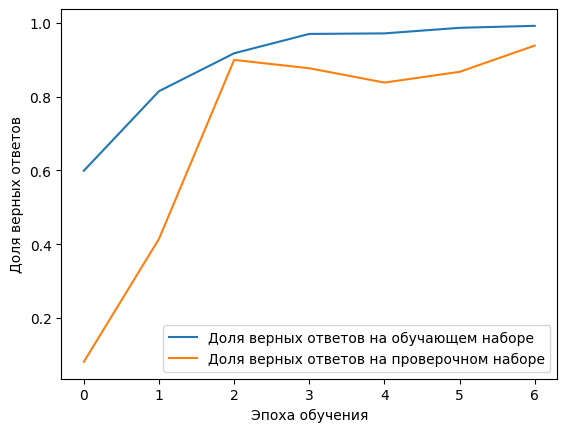

In [14]:
plt.plot(history_gru.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history_gru.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

plt.legend()
plt.show()

In [15]:
text = 'Автомобили ДТП жесть, авария'

predict_class(model_gru, tokenizer, text, y_train, MAX_NEWS_LEN)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


'АВТО БАТЯ'

In [16]:
text = 'На перекрестке произошло жесткое ДТП с участием 3 машин'

predict_class(model_gru, tokenizer, text, y_train, MAX_NEWS_LEN)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


'АВТО БАТЯ'

In [17]:
text = 'Во время перелета Москва - Дубаи закончилось питание на борту'

predict_class(model_gru, tokenizer, text, y_train, MAX_NEWS_LEN)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


'АЭРОФЛОТ'

In [18]:
text = 'На восток перевозили 10 кг угля в особых вагонах'

predict_class(model_gru, tokenizer, text, y_train, MAX_NEWS_LEN)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


'Телеграмма РЖД'

In [20]:
SAVE_MODEL_PATH = '../learned_models'
save_model(model_gru, f'{SAVE_MODEL_PATH}/model_gru.h5')